In [8]:

from IPython.display import Image
#Image("images/pre-image.png")

# Addressing the pre-image problem
---

Consider a input space $\mathcal{X}$, where $\{x_1,x_2,\ldots x_n\}$ denote a set of available observations of $\mathcal{X}$ .

Let $\mathcal{H}$ be a Hilbert space of functions defined on some compact $\mathcal{X}$ ,

Consider a pattern $\psi$ in the feature space $\mathcal{H}$, obtained by a kernel-based machine. Let $\psi= \sum_{i=1}^n\alpha_i\phi(x_i)$, a linear projection.
The pre-image problem may be addressed as the following optimization problem:

$$x^* = argmin_{x\in \mathcal{X}}||\sum_{i=1}^n \alpha_i\phi(x_i)-\phi(x)||^2_\mathcal{H}$$

where we seek $x^*$ whose map $\phi(x^*)$ is as close as possible to $\psi$.

Equivalently, from the kernel trick, $x^*$ minimize the function

$$\Xi = k(x,x)-2\sum_{i=1}^n\alpha k(x,x_i)$$

![title](images/pre-image.png)(Honeine and Richard,2011)

$\textbf{Iterative scheme for Finding the Pre-Image}$ (Tin-Yau and Wai-Hung, 2004)

Recover an $x^*$ where $\varphi(x^*)\backsimeq P_\varphi (x)$ can be solved by minimmizing the squared distance between $\varphi(x^*)$ and $P_\varphi (x)$ (Mika, et.al, 1998)

$$||\varphi(x^*) - P_\varphi (x)||^2 = ||\varphi(x^*)||^2 - 2P_\varphi (x)'\varphi(x^*) + \Omega$$

where $\Omega$ term is independent of $x^*$

For instance, for a Gaussian kernel of the form $k(x,y)=exp(-||x-y||^2/c)$, this nonlinear optimization can be solved by a fixed-point iteration method. On setting the derivative to zero, the following iteration formula might be obtained:

$$ x^*_{t+1} = \frac{\sum_{i=1}^n\hat{\gamma}_i exp(-||x^*_t-x_t||^2/c)x_i}{\sum_{i=1}^n\hat{\gamma}_i exp(-||x^*_t-x_t||^2/c)}$$

(Tin-Yau and Wai-Hung, 2004) point out that iteration scheme is numerically unstable and susceptible to initial choose for $x^*_0$

$\textbf{Exact pre-images}$ (Bakir, Weston and Scholkopf, 2004)

An exact pre-image exists, if the kernel can be written as $k(x,y)=f_k((x^Ty))$ with an invertible function $f_k$, e.g. $k(x,y)=(x^Ty)^d$ with odd $d$, then the pre-image can be computed as $$x^*=\sum_{j=1}^nf_k^{-1}(\sum_{j=1}^m\alpha_j k(x_j,e_i))e_i$$, where $\{e_1\ldots e_n\}$ is any orthonormal basis of input space.

## Methods to solve the optimization problem

(Honeine and Richard,2011)

$\textbf{Gradient Descent Techniques}$

Compute the gradient the objective function $\nabla_x \Xi(x^*)$ and guess $x^*$ by stepping into the  direction opposite to the gradient, i.e.

$$x_{t+1}=x_t-\eta \nabla_x \Xi(x^*)$$

where $\eta$ is the step-size parameter.

$\textbf{Fixed-Point Iteration Method}$

Setting to zero the function to minimize, we can derivate a fixed-point iteration method. Taking for instance a Gaussian kernel, the objective function is formulated as:

$$-2\sum_{i=1}^n\alpha_i exp(-||x-x_i||^2/2\sigma^2)$$

with its gradient

$$\nabla_x \Xi(x)=-\frac{2}{\sigma^2}\sum_{i=1}^n\alpha_i exp(\frac{-||x-x_i||^2}{2\sigma^2})(x-x_i)$$

by sitting this gradient a zero

$$ x^*_{t+1} = \frac{\sum_{i=1}^n\alpha_i exp(-||x^*_t-x_i||^2/2\sigma^2)x_i}{\sum_{i=1}^n\alpha_i exp(-||x^*_t-x_i||^2/2\sigma^2)}$$

$\textbf{Learning The Preimage Map}$

A learning machine is contructed to find the preimage map, with training elements of feature space and estimated values in the input space. We seek estimate a function $\Gamma^*$ such that $\Gamma^*(\phi(x_i)) = x_i$. Then, ideally $\Gamma^*(\psi)$ should give $x*$ the preimage of $\psi$.

Two issues are consider in order to make the problem computationally tractable:

* The function is defined on a vector space. This can be done by representing vectorwise $\psi \in \mathcal{H}$ with $[\langle\psi,\psi_1 \rangle \langle\psi, \psi_2 \rangle \ldots \langle\psi,\psi_k \rangle]$, using orthogonal basis obtained from kernel PCA.
* The preimage mas is decomposed into $dim(\mathcal{X})$ functions to estimate each component of $x^*$.

Hence, we seek functions $\Gamma^*_1, \Gamma^*_2, \ldots \Gamma^*_{dim(\mathcal{X})}$ with $\Gamma^*_m:\mathbb{R}\rightarrow\mathbb{R}$. They are obtained for solving the optimization problem:

$$\Gamma^*_m = argmin_\Gamma \sum_{i=1}^nf([x_i]_m,\Gamma(\psi))+\eta g(||\Gamma||^2)$$

where $f(\cdot,\cdot)$ is a loss function and $[\cdot]_m$ denots the m-th component operator.

$\textbf{Multidimensional Scaling-Based Techniques}$

$\textbf{Conformal Map Approach}$

# Testing pre-image methods

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import scipy.io as sio #to load mat files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Synthetic data with 867 examples, 3 attributes (x, y, z), 1 label with three classes (c)

In [1]:
#sio.whosmat('../datasets/sphere_data.mat')
mat_data = sio.loadmat('../datasets/sphere_data.mat')
sphere = np.squeeze(np.asarray([mat_data['x'],mat_data['y'],mat_data['z']])).T
sphere_label = np.squeeze(np.asarray(mat_data['c']))

NameError: name 'sio' is not defined

In [3]:
sphere.shape

(867, 3)

/opt/anaconda/envs/mindlabenv/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


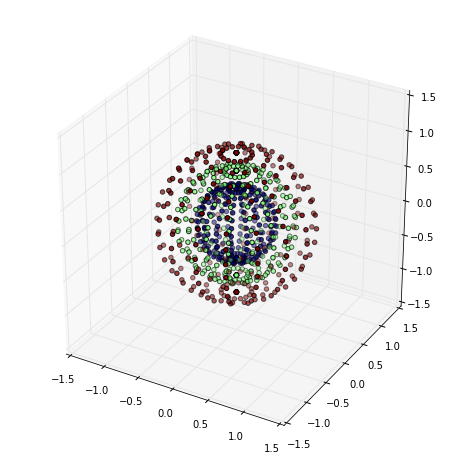

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
sc = ax.scatter(
           sphere[:,0], sphere[:,1], sphere[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )
#plt.colorbar(sc)
plt.show()                                            # render the plot

Pre-image of $\textit{Gaussian Kernel}$ applied in $\textbf{Kernel PCA}$

In [62]:
from sklearn.decomposition import PCA, KernelPCA

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(sphere)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(sphere)


<function matplotlib.pyplot.show>

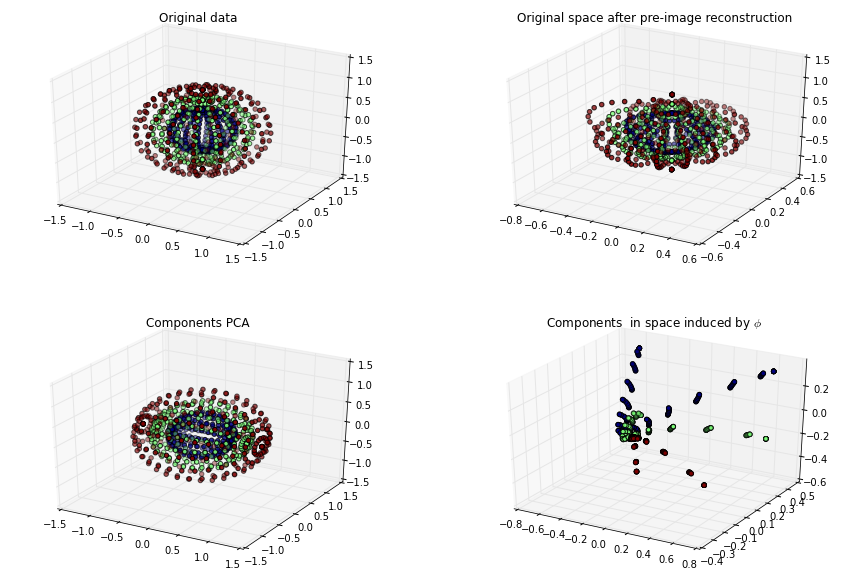

In [84]:
#plot resutlts kPCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.set_title("Original data")
sc = ax.scatter(
           sphere[:,0], sphere[:,1], sphere[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.set_title("Original space after pre-image reconstruction")
sc = ax.scatter(
           X_back[:,0], X_back[:,1], X_back[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.set_title("Components PCA")
sc = ax.scatter(
           X_pca[:,0], X_pca[:,1], X_pca[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.set_title("Components  in space induced by $\phi$")
sc = ax.scatter(
           X_kpca[:,0], X_kpca[:,1], X_kpca[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

plt.show

## Testing preimage methods

In [3]:
import kernel as kernel

According to Bakır, Schölkopf, & Weston (2007) updating rule of fixed-point method can be generalized as:

$$x^*_{t+1} = \frac{\sum_{i=1}^n\alpha k'(x_i,x_t)x_i}{\sum_{i=1}^n\alpha k'(x_i,x_t)} $$

where $k'(\cdot)$ refers to the derivate of the kernel function $k(\cdot)$

Honeine and Richard (2011) point out a similar fixed-point iterative expresion:

$$x^*_{t+1} = \frac{\sum_{i=1}^n\alpha k(x_i,x_t)x_i}{\sum_{i=1}^n\alpha k(x_i,x_t)} $$

Testing my implementation of fixed-point method to compute pre-image of $\textit{Gaussian Kernel}$ with updating rule:

$$ x^*_{t+1} = \frac{\sum_{i=1}^n\alpha_i exp(-||x^*_t-x_i||^2/2\sigma^2)x_i}{\sum_{i=1}^n\alpha_i exp(-||x^*_t-x_i||^2/2\sigma^2)}$$


In [4]:
sigma = 0.5
alpha = np.ones(sphere.shape[0])
preimxg, trainErrorsg = kernel.preimage_isot(sphere, alpha, 'rbf', gamma=(2*sigma)**-2)
preimxp, trainErrorsp = kernel.preimage_isot(sphere, alpha, 'poly', degree=2,coef0=1)
preimxl, trainErrorsl = kernel.preimage_isot(sphere, alpha, 'linear')
preimxg_, trainErrorsg_ = kernel.preimage(sphere, alpha, 'rbf', gamma=(2*sigma)**-2)
preimxp_, trainErrorsp_ = kernel.preimage(sphere, alpha, 'poly', degree=2,coef0=1)
preimxl_, trainErrorsl_ = kernel.preimage(sphere, alpha, 'linear')
preimxlxg_, trainErrorslxg_ = kernel.preimage(sphere, alpha, 'linxrbf', gamma=(2*sigma)**-2)
preimxlxg, trainErrorslxg = kernel.preimage_linxrbf(sphere, alpha, 'linxrbf', gamma=(2*sigma)**-2,coef0=1)
preimxpxg, trainErrorspxg = kernel.preimage_isot(sphere, alpha, 'polyxrbf', gamma=(2*sigma)**-2, degree=2,coef0=1)
#preimxpxg_, trainErrorspxg_ = kernel.preimage(sphere, alpha, 'polyxrbf', gamma=(2*sigma)**-2, degree=3,coef0=1)

$\textbf{Objective function}$:
$$min_{x^*\in \mathcal{X}}||\sum_{i=1}^n \alpha_i\phi(x_i)-\phi(x^*)||^2 = min_{x^*\in \mathcal{X}}\{k(x^*,x^*)-2\sum_{i=1}^n\alpha_ik(x_i,x^*)\}$$

In [5]:
#compute errors
fog = np.ones(len(trainErrorsg))

for idx,xpre in enumerate(trainErrorsg):
    #print idx, xpre
    fog[idx] = kernel._get_kernel(xpre,xpre,'rbf', gamma=(2*sigma)**-2) - 2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'rbf', gamma=(2*sigma)**-2)),alpha)

fop = np.ones(len(trainErrorsp))

for idx,xpre in enumerate(trainErrorsp):
    #print idx, xpre
    fop[idx] = kernel._get_kernel(xpre,xpre,'poly', degree=2,coef0=1) - 2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'poly', degree=2,coef0=1)),alpha)

fol = np.ones(len(trainErrorsl))

for idx,xpre in enumerate(trainErrorsl):
    #print idx, xpre
    fol[idx] = kernel._get_kernel(xpre,xpre,'linear') - 2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'linear')),alpha)
   
    
fog_ = np.ones(len(trainErrorsg_))

for idx,xpre in enumerate(trainErrorsg_):
    #print idx, xpre
    fog_[idx] = kernel._get_kernel(xpre,xpre,'rbf', gamma=(2*sigma)**-2) - 2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'rbf', gamma=(2*sigma)**-2)),alpha)

fop_ = np.ones(len(trainErrorsp_))

for idx,xpre in enumerate(trainErrorsp_):
    #print idx, xpre
    fop_[idx] = kernel._get_kernel(xpre,xpre,'poly', degree=2,coef0=1) - 2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'poly', degree=2,coef0=1)),alpha)

fol_ = np.ones(len(trainErrorsl_))

for idx,xpre in enumerate(trainErrorsl_):
    #print idx, xpre
    fol_[idx] = kernel._get_kernel(xpre,xpre,'linear') - 2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'linear')),alpha)

    
folxg_ = np.ones(len(trainErrorslxg_))

for idx,xpre in enumerate(trainErrorslxg_):
    #print idx, xpre
    folxg_[idx] = kernel._get_kernel(xpre,xpre,'linxrbf', gamma=(2*sigma)**-2) - 2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'linxrbf', gamma=(2*sigma)**-2)),alpha)

folxg = np.ones(len(trainErrorslxg))

for idx,xpre in enumerate(trainErrorslxg):
    #print idx, xpre
    folxg[idx] = kernel._get_kernel(xpre,xpre,'linxrbf', gamma=(2*sigma)**-2) - 2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'linxrbf', gamma=(2*sigma)**-2)),alpha)

    
fopxg = np.ones(len(trainErrorspxg))

for idx,xpre in enumerate(trainErrorspxg):
    #print idx, xpre
    fopxg[idx] = kernel._get_kernel(xpre,xpre,'polyxrbf', gamma=(2*sigma)**-2, degree=2,coef0=1)
    #fopxg[idx] = -2*np.dot(np.squeeze(kernel._get_kernel(sphere,xpre,'polyxrbf', gamma=(2*sigma)**-2, degree=2,coef0=1)),alpha)

#kernel.trainErrors[0]

In [5]:
kernel._get_kernel_deriv(sphere[0], sphere[0], 'polyxrbf', gamma=(2*sigma)**-2, degree=2,coef0=1)   

-0.203125

In [11]:
np.array([2,3,1,0]).shape
#np.dot(np.array([2,3,1,0]).T, np.array([1,0,1,0]))

(4,)

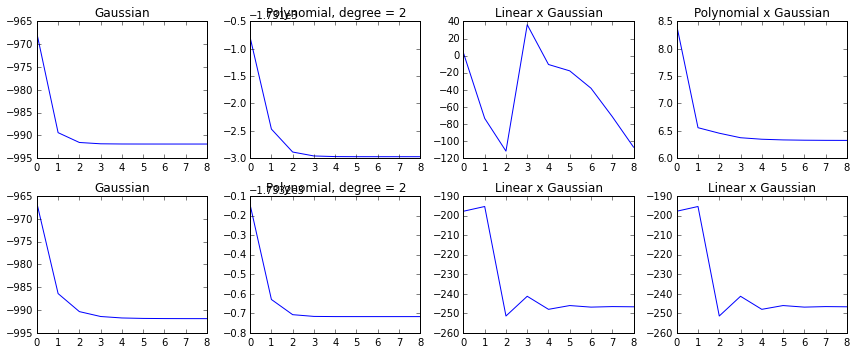

In [6]:
#plt.plot(np.arange(0,len(trainErrors)), fo)
f, axarr = plt.subplots(2, 4)
axarr[0, 0].plot(np.arange(0,len(trainErrorsg)), fog)
axarr[0, 0].set_title('Gaussian')
axarr[0, 1].plot(np.arange(0,len(trainErrorsp)), fop)
axarr[0, 1].set_title('Polynomial, degree = 2')
axarr[0, 2].plot(np.arange(0,len(trainErrorslxg)), folxg)
axarr[0, 2].set_title('Linear x Gaussian')
axarr[0, 3].plot(np.arange(0,len(trainErrorspxg)), fopxg)
axarr[0, 3].set_title('Polynomial x Gaussian')
axarr[1, 0].plot(np.arange(0,len(trainErrorsg_)), fog_)
axarr[1, 0].set_title('Gaussian')
axarr[1, 1].plot(np.arange(0,len(trainErrorsp_)), fop_)
axarr[1, 1].set_title('Polynomial, degree = 2')
axarr[1, 2].plot(np.arange(0,len(trainErrorslxg_)), folxg_)
axarr[1, 2].set_title('Linear x Gaussian')
axarr[1, 3].plot(np.arange(0,len(trainErrorslxg_)), folxg_)
axarr[1, 3].set_title('Linear x Gaussian')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
#plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
#plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
f.set_size_inches(12,5)
f.tight_layout()



Testing my implementation of fixed-point method to compute pre-image of $\textit{Polynomial Kernel}$ with updating rule generalized:

$$ x^*_{t+1} = \frac{\sum_{i=1}^n\alpha_i exp(-||x^*_t-x_i||^2/2\sigma^2)x_i}{\sum_{i=1}^n\alpha_i exp(-||x^*_t-x_i||^2/2\sigma^2)}$$

# Pre-image problem in Kernel-NMF

$\textbf{ Online Kernel Non-Negative Matrix Factorization*}$(Paez, 2011)

Online kernel-NMF $\phi(X) \approx \phi(X)WH$ 

Loss function:

$\min_{W,h_i}\frac{1}{2}||\phi(x_i)-\phi(X)Wh_i||^2+\frac{\lambda}{2}||W||_F^2+\frac{\alpha}{2}||h_i||_F^2$

Algorithm iterate assesing the following updated rules (SGD):

$h_t = (W^T_{t-1}K(X,X)W_{t-1}-\alpha I) W^T_{t-1}K(X,x_t)$

$W_t = W_{t-1}-\gamma(k(X,x_t)h_t^T-k(X,X)W_{t-1}h_th_t^T+\lambda W_{t-1})$

In [16]:
from sklearn.metrics import pairwise_kernels as K #to compute kernel matrix
import scipy.io as sio #to load mat files
from OKMF import OKMF #Online Kernel Matrix Factorization
import kernel as Kp #Compute pre-image

In [87]:
sphere.shape

(867, 3)

In [100]:
#Parameters:
Gamma = 0.01
Lambda = 0.0001
Alpha = 0.3
sigma = 2**-2
epochs = 3

In [101]:
#online kernel NMF algorithm (by Esteban)
ok = OKMF(867,3,10,epochs,Gamma,Lambda,Alpha,'rbf',gamma=sigma)
#(budgetSize,latentTopics,minibatchSize,epochs,Gamma,Lambda,Alpha,metric,**kwds):

In [102]:
ok.fit(sphere,calculateErrors=True)

Train Error:

$2\epsilon = tr(K(x_i,x_i))+tr(h^TW^TK(X,x_i))+tr(K(X,x_i)^TWh)+tr(W^TK(X,X)h^TWh)+\lambda tr(W^TW)+\alpha tr(h^Th)$

In [103]:
ok.trainErrors

array([ -1.47105233e+09,   4.42289024e+10,   4.42201837e+10,
         4.42113320e+10])

Error as $||WH-\phi(X)||_F/||\phi(X)||_F$

In [104]:
error = np.linalg.norm(np.dot(ok.W,ok.H)- ok._KB,'fro')/np.linalg.norm(ok._KB,'fro')
print error

1.000087792


In [105]:
np.dot(ok.W,ok.H).shape

(867, 867)

In [108]:
ok.H.shape

(3, 867)

$\textbf{Convex Kernel Non-negative Matrix Factorization}$

In [4]:
import pymf
from pymf.cnmf import CNMF 

In [5]:
#Exploring bases
bases = np.arange(2,4)
fopx = np.ones(len(bases))
for idx,item in enumerate(bases):        
    cnmf_mdl = CNMF(sphere, item)
    cnmf_mdl.factorize(niter=10)
    fopx[idx] = np.linalg.norm(sphere - np.dot(cnmf_mdl.W,cnmf_mdl.H))

In [6]:
print "min base ", bases[np.argmin(fopx)]

min base  3


In [7]:
#data = np.array([[1.0, 0.0, 2.0], [0.0, 1.0, 1.0]]) 
cnmf_mdl = CNMF(sphere, num_bases=2)
cnmf_mdl.factorize(niter=10)

In [8]:
np.dot(cnmf_mdl.W,cnmf_mdl.H).shape

(867, 3)

Exploring parameters for Convex-NMF with Linear kernel


In [9]:
KlX = kernel._get_kernel(sphere, sphere,'linear')

In [10]:
bases = np.arange(2,KlX.shape[1]/9)
fopxl = np.ones(len(bases))
for idx,item in enumerate(bases):        
    cnmf_kl = CNMF(KlX, item)
    cnmf_kl.factorize(niter=10)
    fopxl[idx] = np.linalg.norm(KlX - np.dot(cnmf_kl.W,cnmf_kl.H))

In [11]:
print "min base ", bases[np.argmin(fopxl)]

min base  25


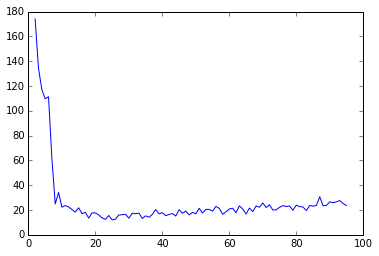

In [12]:
plt.plot(bases,fopxl)

Exploring parameters for Convex-NMF with Gaussian kernel 

In [13]:
sigma = 0.5
KgX = kernel._get_kernel(sphere, sphere,'rbf', gamma=(2*sigma)**-2)

In [14]:
KgX.shape

(867, 867)

In [15]:
cnmf_kg = CNMF(sphere, num_bases=3)
cnmf_kg.factorize(niter=10)

In [17]:
bases = np.arange(2,sphere.shape[1]+1)
fopxg = np.ones(len(bases))
for idx,item in enumerate(bases):        
    cnmf_kg = CNMF(sphere, item)
    cnmf_kg.factorize(niter=10)
    fopxg[idx] = np.linalg.norm(sphere - np.dot(cnmf_kg.W,cnmf_kg.H))
    print "Error : ", fopxg[idx]

Error :  10.7867681855
Error :  0.029867916363


In [18]:
bases = np.arange(2,KgX.shape[1]/9)
fopxg = np.ones(len(bases))
for idx,item in enumerate(bases):        
    cnmf_kg = CNMF(KgX, item)
    cnmf_kg.factorize(niter=10)
    fopxg[idx] = np.linalg.norm(KgX - np.dot(cnmf_kg.W,cnmf_kg.H))
    #print "Error : ",idx, fopxg[idx]

In [19]:
print "min base ", bases[np.argmin(fopxg)]

min base  13


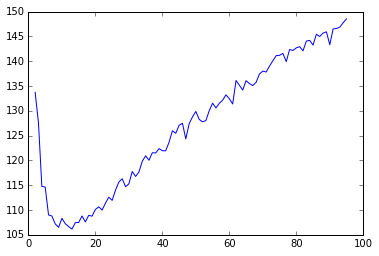

In [20]:
plt.plot(bases,fopxg)


Exploring parameters for Convex-NMF with Polynomial kernel

In [65]:
KpX = kernel._get_kernel(sphere,sphere,'poly', degree=2,coef0=1)

In [66]:
bases = np.arange(2,KpX.shape[1]/9)
fopxp = np.ones(len(bases))
for idx,item in enumerate(bases):        
    cnmf_kp = CNMF(KpX, item)
    cnmf_kp.factorize(niter=10)
    fopxp[idx] = np.linalg.norm(KpX - np.dot(cnmf_kp.W,cnmf_kp.H))

In [72]:
print "min base ", bases[np.argmin(fopxp)]

min base  4


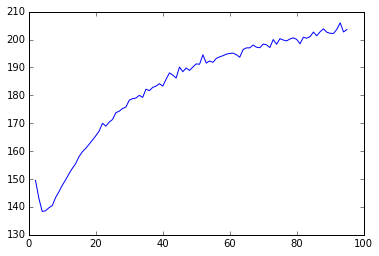

In [67]:
plt.plot(bases,fopxp)

Exploring parameters for Convex-NMF with Linear x Gaussian kernel

In [73]:
sigma = 0.5
KlxgX = kernel._get_kernel(sphere, sphere,'linxrbf', gamma=(2*sigma)**-2)

In [74]:
bases = np.arange(2,KlxgX.shape[1]/9)
fopxlxg = np.ones(len(bases))
for idx,item in enumerate(bases):        
    cnmf_klxg = CNMF(KlxgX, item)
    cnmf_klxg.factorize(niter=10)
    fopxlxg[idx] = np.linalg.norm(KlxgX - np.dot(cnmf_klxg.W,cnmf_klxg.H))

In [75]:
print "min base ", bases[np.argmin(fopxlxg)]

min base  31


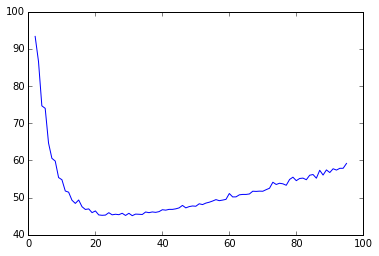

In [76]:
plt.plot(bases,fopxlxg)

Exploring parameters for Convex-NMF with Polynomial x Gaussian kernel

In [277]:
sigma = 0.5
KpxgX = kernel._get_kernel(sphere,sphere,'polyxrbf', gamma=(2*sigma)**-2, degree=2,coef0=1)

In [278]:
bases = np.arange(2,KpxgX.shape[1]/9)
fopxpxg = np.ones(len(bases))
for idx,item in enumerate(bases):        
    cnmf_kpxg = CNMF(KpxgX, item)
    cnmf_kpxg.factorize(niter=10)
    fopxpxg[idx] = np.linalg.norm(KpxgX - np.dot(cnmf_kpxg.W,cnmf_kpxg.H))

In [279]:
print "min base ", bases[np.argmin(fopxpxg)]

min base  12


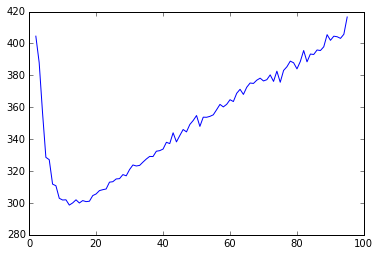

In [280]:
plt.plot(bases,fopxpxg)

$\textbf{Testing pre-image reconstruction}$

Pre-image reconstruction with whole dataset.

Linear kernel

In [22]:
cnmf_kl = CNMF(KlX, num_bases=25)
cnmf_kl.factorize(niter=10)
np.linalg.norm(KlX - np.dot(cnmf_kl.W,cnmf_kl.H))

16.78460906210567

/opt/anaconda/envs/mindlabenv/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


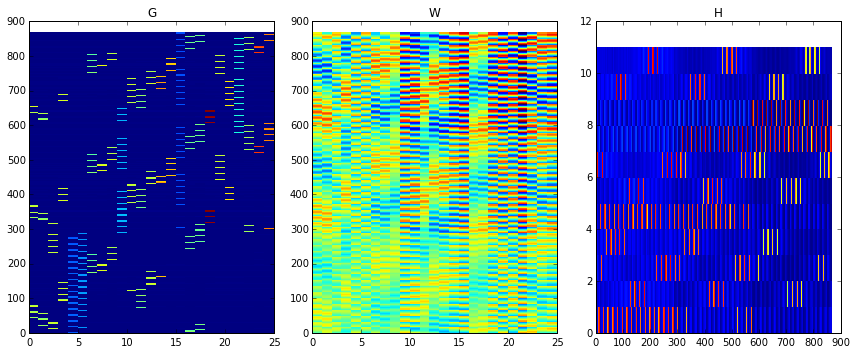

In [23]:
f, axarr = plt.subplots(1, 3)
axarr[0].pcolor(cnmf_kl.G)
axarr[0].set_title('G')
axarr[1].pcolor(cnmf_kl.W)
axarr[1].set_title('W')
axarr[2].pcolor(cnmf_kg.H)
axarr[2].set_title('H')
f.set_size_inches(12,5)
f.tight_layout()

Using $H$ matrix from Convex-NMF as $\alpha$ in pre-image reconstruction method:

In [100]:
num_bases = 25
preimxkl = np.zeros(sphere.shape)
for i in range (0,cnmf_kl.H.shape[1]):
    xs = np.vstack((sphere[i],sphere[i])).repeat([1,num_bases-1],0)
    alpha = cnmf_kl.H[:,i]#np.mean(cnmf_kg.H,0)
    preimxkl[i], trainErrorskl = kernel.preimage(xs, alpha, 'linear')

In [103]:
print "Error: ",np.linalg.norm(sphere - preimxkl)

 Error:  4.33852919435e-15


<function matplotlib.pyplot.show>

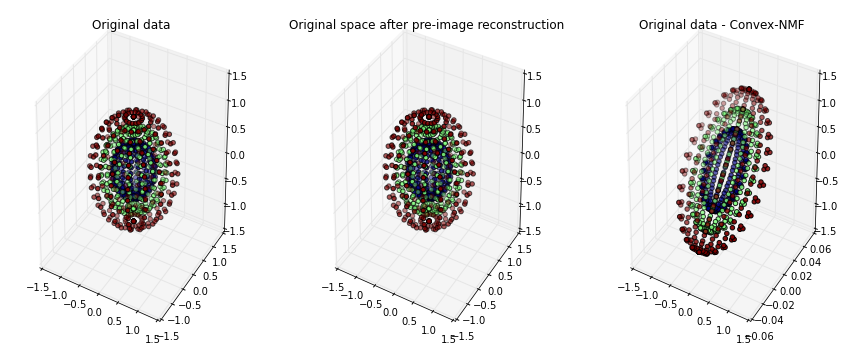

In [104]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.set_title("Original data")
sc = ax.scatter(
           sphere[:,0], sphere[:,1], sphere[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.set_title("Original space after pre-image reconstruction")
sc = ax.scatter(
           preimxkl[:,0], preimxkl[:,1], preimxkl[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.set_title("Original data - Convex-NMF")
sc = ax.scatter(
           np.dot(cnmf_mdl.W,cnmf_mdl.H)[:,0], np.dot(cnmf_mdl.W,cnmf_mdl.H)[:,1], np.dot(cnmf_mdl.W,cnmf_mdl.H)[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

plt.show

Gaussian kernel

In [24]:
cnmf_kg = CNMF(KgX, num_bases=11)
cnmf_kg.factorize(niter=10)
np.linalg.norm(KgX - np.dot(cnmf_kg.W,cnmf_kg.H)) # or >>> np.linalg.norm(KgX - np.dot(np.dot(KgX,cnmf_kg.G),cnmf_kg.H))

105.38688559292859

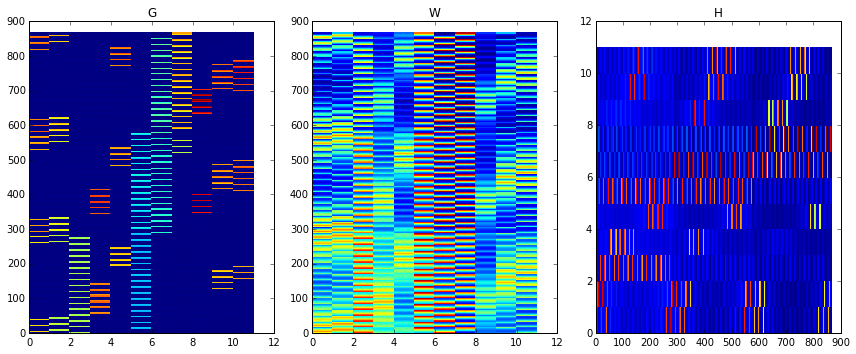

In [25]:
f, axarr = plt.subplots(1, 3)
axarr[0].pcolor(cnmf_kg.G)
axarr[0].set_title('G')
axarr[1].pcolor(cnmf_kg.W)
axarr[1].set_title('W')
axarr[2].pcolor(cnmf_kg.H)
axarr[2].set_title('H')
f.set_size_inches(12,5)
f.tight_layout()

Using $H$ matrix from Convex-NMF as $\alpha$ in pre-image reconstruction method:

In [250]:
num_bases = 11
preimxkg = np.zeros(sphere.shape)
for i in range (0,cnmf_kg.H.shape[1]):
    xs = np.vstack((sphere[i],sphere[i])).repeat([1,num_bases-1],0)
    alpha = cnmf_kg.H[:,i]#np.mean(cnmf_kg.H,0)
    preimxkg[i], trainErrorskg = kernel.preimage_isot(xs, alpha, 'rbf', gamma=(2*sigma)**-2)


In [259]:
print "Error: ",np.linalg.norm(sphere - preimxkg)

Error:  3.30432721401e-15


<function matplotlib.pyplot.show>

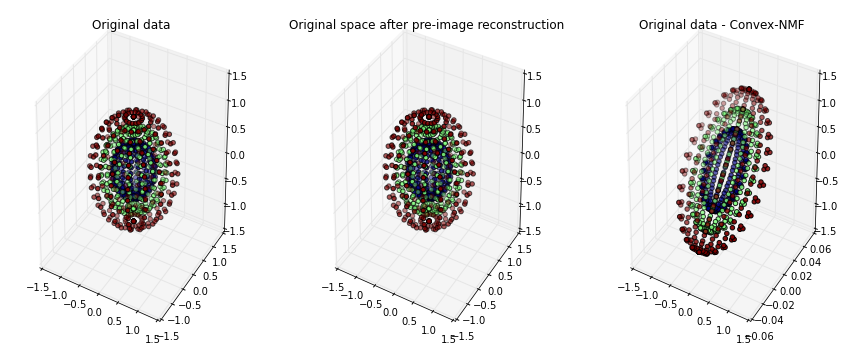

In [411]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.set_title("Original data")
sc = ax.scatter(
           sphere[:,0], sphere[:,1], sphere[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.set_title("Original space after pre-image reconstruction")
sc = ax.scatter(
           preimxkg[:,0], preimxkg[:,1], preimxkg[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.set_title("Original data - Convex-NMF")
sc = ax.scatter(
           np.dot(cnmf_mdl.W,cnmf_mdl.H)[:,0], np.dot(cnmf_mdl.W,cnmf_mdl.H)[:,1], np.dot(cnmf_mdl.W,cnmf_mdl.H)[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

plt.show

Linear x Gaussian kernel

In [263]:
cnmf_klxg = CNMF(KlxgX, num_bases=19)
cnmf_klxg.factorize(niter=10)
np.linalg.norm(KlxgX - np.dot(cnmf_klxg.W,cnmf_klxg.H)) # or >>> np.linalg.norm(KgX - np.dot(np.dot(KgX,cnmf_kg.G),cnmf_kg.H))

45.807151495066421

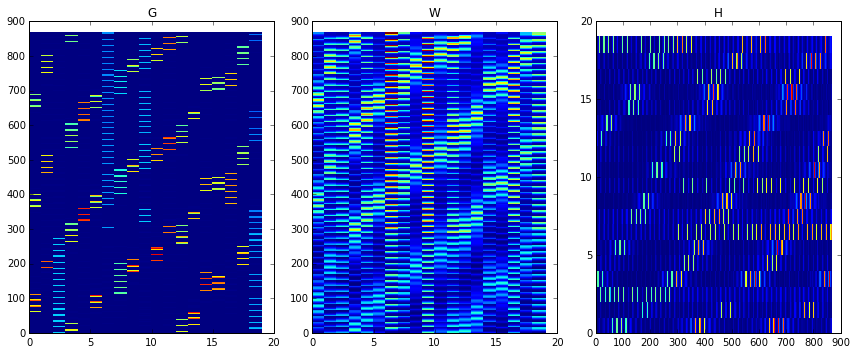

In [264]:
f, axarr = plt.subplots(1, 3)
axarr[0].pcolor(cnmf_klxg.G)
axarr[0].set_title('G')
axarr[1].pcolor(cnmf_klxg.W)
axarr[1].set_title('W')
axarr[2].pcolor(cnmf_klxg.H)
axarr[2].set_title('H')
f.set_size_inches(12,5)
f.tight_layout()

Using $H$ matrix from Convex-NMF as $\alpha$ in pre-image reconstruction method:

In [273]:
num_bases = 19
preimxklxg = np.zeros(sphere.shape)
for i in range (0,cnmf_klxg.H.shape[1]):
    xs = np.vstack((sphere[i],sphere[i])).repeat([1,num_bases-1],0)
    alpha = cnmf_klxg.H[:,i]#np.mean(cnmf_kg.H,0)
    #preimxklxg[i], trainErrorskg = kernel.preimage_linxrbf(xs, alpha, 'linxrbf', gamma=(2*sigma)**-2,coef0=1)
    preimxklxg[i], trainErrorskg = kernel.preimage(xs, alpha, 'linxrbf', gamma=(2*sigma)**-2)

In [275]:
print "Error: ",np.linalg.norm(sphere - preimxklxg)
#preimxklxg

Error:  3.98144396394e-15


<function matplotlib.pyplot.show>

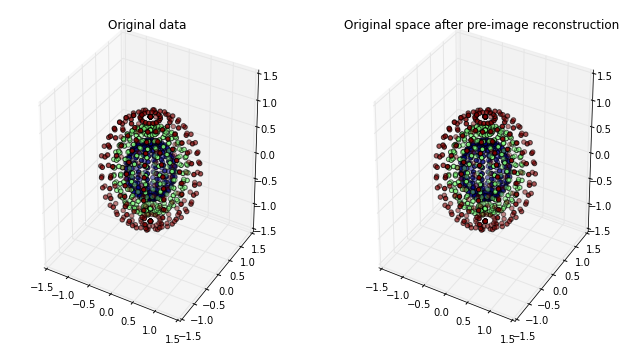

In [276]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title("Original data")
sc = ax.scatter(
           sphere[:,0], sphere[:,1], sphere[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title("Original space after pre-image reconstruction")
sc = ax.scatter(
           preimxklxg[:,0], preimxklxg[:,1], preimxklxg[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )
plt.show

Polynomial x Gaussian kernel

In [281]:
cnmf_kpxg = CNMF(KpxgX, num_bases=12)
cnmf_kpxg.factorize(niter=10)
np.linalg.norm(KpxgX - np.dot(cnmf_kpxg.W,cnmf_kpxg.H)) # or >>> np.linalg.norm(KgX - np.dot(np.dot(KgX,cnmf_kg.G),cnmf_kg.H))

302.29206098628003

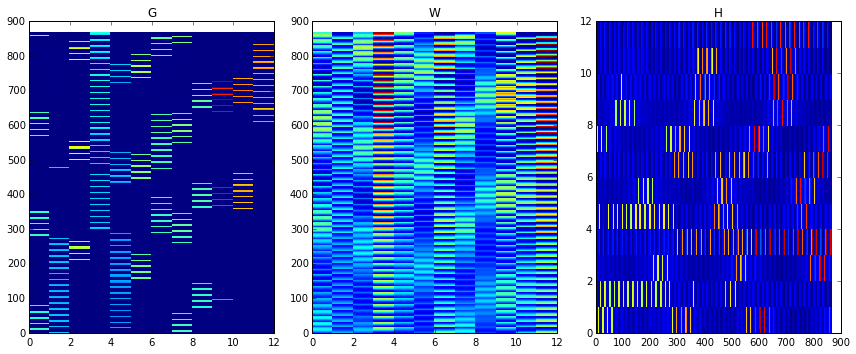

In [283]:
f, axarr = plt.subplots(1, 3)
axarr[0].pcolor(cnmf_kpxg.G)
axarr[0].set_title('G')
axarr[1].pcolor(cnmf_kpxg.W)
axarr[1].set_title('W')
axarr[2].pcolor(cnmf_kpxg.H)
axarr[2].set_title('H')
f.set_size_inches(12,5)
f.tight_layout()

Using $H$ matrix from Convex-NMF as $\alpha$ in pre-image reconstruction method:

In [294]:
num_bases = 12
preimxkpxg = np.zeros(sphere.shape)
for i in range (0,cnmf_kpxg.H.shape[1]):
    xs = np.vstack((sphere[i],sphere[i])).repeat([1,num_bases-1],0)
    alpha = cnmf_kpxg.H[:,i]#np.mean(cnmf_kg.H,0)    
    preimxkpxg[i], trainErrorskg = kernel.preimage_isot(xs, alpha, 'polyxrbf', gamma=(2*sigma)**-2, degree=2,coef0=1)
    #print preimxkpxg[i]

In [295]:
print "Error: ",np.linalg.norm(sphere - preimxkpxg)

Error:  nan


<function matplotlib.pyplot.show>

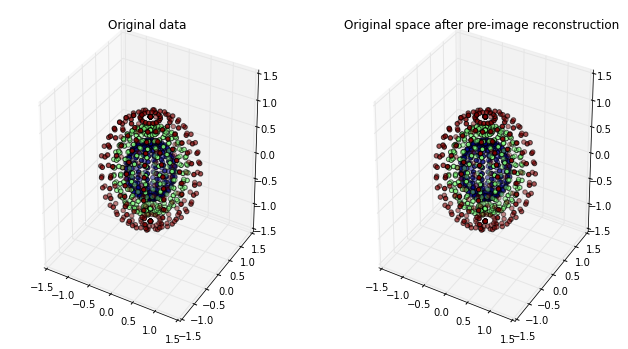

In [297]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title("Original data")
sc = ax.scatter(
           sphere[:,0], sphere[:,1], sphere[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title("Original space after pre-image reconstruction")
sc = ax.scatter(
           preimxkpxg[:,0], preimxkpxg[:,1], preimxkpxg[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )
plt.show

$\textbf{Data preprocessing}$

We have split data set in two subsets, the first one contain unchanged data while the other one is randomly selected to make it incomplete.

In [5]:
rt_obinc = 0.3 # rate of objects incomplete
rt_incpob = 0.6 # rate of elements (attributes or variables) incomplete for each object
idx_inc = np.sort(np.random.choice(sphere.shape[0], sphere.shape[0]*rt_obinc, replace=False))
idx_vsphere = np.ones(sphere.shape[0])
idx_vsphere[idx_inc] = 0
idx_sphere = np.vstack((idx_vsphere,idx_vsphere)).repeat([1,sphere.shape[1]-1],0).T
idx_com = np.arange(0,sphere.shape[0]-1)
idx_com = np.delete(idx_com, idx_inc)
sphere_i = sphere[idx_inc]#subset with incomplete elements
sphere_c = sphere[idx_com]#subset with complete elements

<matplotlib.colorbar.Colorbar instance at 0x7f9a60dd7e18>

/opt/anaconda/envs/mindlabenv/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


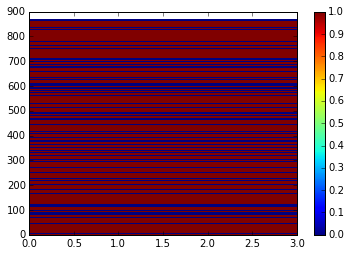

In [6]:
plt.pcolor(idx_sphere)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f9a60a94098>

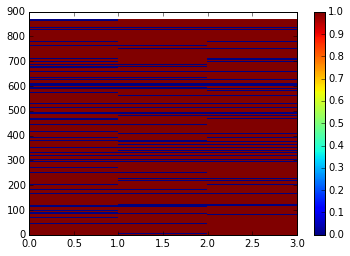

In [7]:
idx_sphere2 = np.copy(idx_sphere) # idx_sphere2 could has partially incomplete objects
for i in idx_inc:
    idx_sphere2[i] = np.random.permutation(np.append(np.random.randint(2,size=2),0))

plt.pcolor(idx_sphere2)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f9a607c8128>

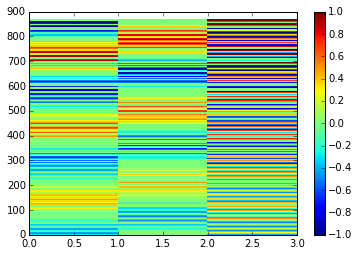

In [8]:
sphere_ci = sphere * idx_sphere2
plt.pcolor(sphere_ci)
plt.colorbar()

Addressing completion over whole dataset as input. Incomplete values were setted as 0.

Exploring parameters for Convex-NMF with Linear kernel

In [9]:
KlX_ci = kernel._get_kernel(sphere_ci, sphere,'linear')

In [10]:
bases = np.arange(2,KlX_ci.shape[1]/9)
fopxl_ci = np.ones(len(bases))
for idx,item in enumerate(bases):        
    cnmf_kl_ci = CNMF(KlX_ci, item)
    cnmf_kl_ci.factorize(niter=10)
    fopxl_ci[idx] = np.linalg.norm(KlX_ci - np.dot(cnmf_kl_ci.W,cnmf_kl_ci.H))

In [11]:
print "min base ", bases[np.argmin(fopxl_ci)]
plt.plot(bases,fopxl_ci)

min base  32


In [13]:
#Factorize
cnmf_kl_ci = CNMF(KlX_ci, num_bases=20)
cnmf_kl_ci.factorize(niter=10)
np.linalg.norm(KlX_ci - np.dot(cnmf_kl_ci.W,cnmf_kl_ci.H))

13.410680041998765

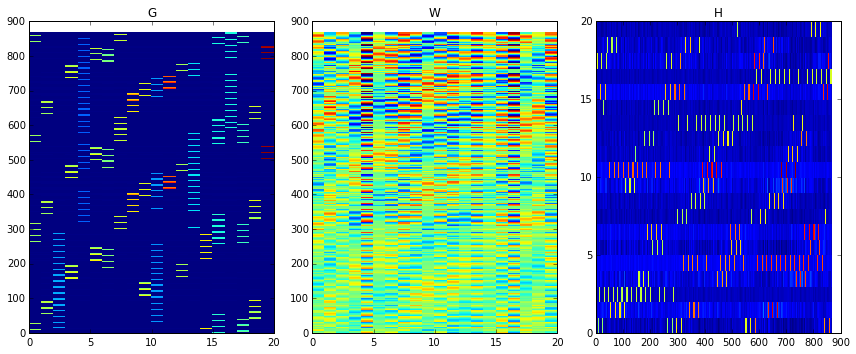

In [14]:
f, axarr = plt.subplots(1, 3)
axarr[0].pcolor(cnmf_kl_ci.G)
axarr[0].set_title('G')
axarr[1].pcolor(cnmf_kl_ci.W)
axarr[1].set_title('W')
axarr[2].pcolor(cnmf_kl_ci.H)
axarr[2].set_title('H')
f.set_size_inches(12,5)
f.tight_layout()

In [106]:
#Compute matrix distance in the feature space
from sklearn.metrics import pairwise_distances as D

In [120]:
DM = D(sphere_ci,metric='euclidean')
DMk = D(KlX_ci,metric='euclidean')

<matplotlib.colorbar.Colorbar instance at 0x7f38cacf6638>

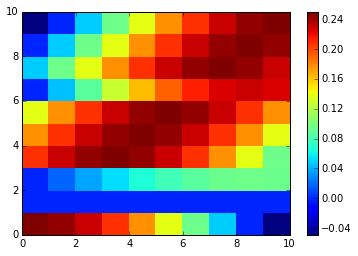

In [119]:
plt.pcolor(KlX_ci[0:10,0:10])
plt.colorbar()

In [17]:
#Pre-image reconstruction
num_atts = sphere_ci.shape[1]
num_bases = 20
preimxkl_ci = np.copy(sphere_ci)
for j in idx_inc:
    # \phi(x_i) to linear projection
    xs = sphere_ci[max(j-num_bases,0):max(j+num_bases,0)]
    xs = np.resize(xs,(num_bases,num_atts))    
    alpha = cnmf_kl_ci.H[:,j] #np.mean(cnmf_kg.H,0)
    preimxkl_ci[j], trainErrorskl = kernel.preimage(xs, alpha, 'linear')

In [19]:
print "Error: ",np.linalg.norm(sphere - preimxkl_ci)

 Error:  119.616198669


<function matplotlib.pyplot.show>

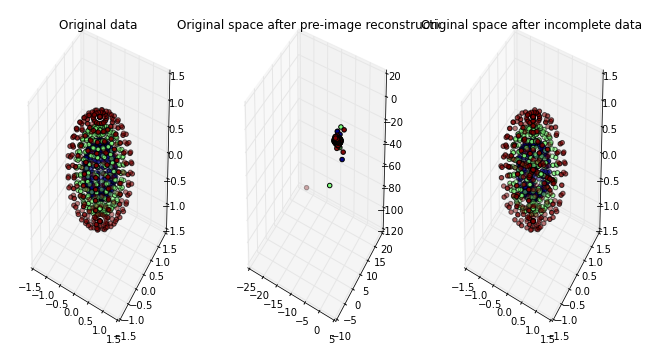

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.set_title("Original data")
sc = ax.scatter(
           sphere[:,0], sphere[:,1], sphere[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.set_title("Original space after pre-image reconstruction")
sc = ax.scatter(
           preimxkl_ci[:,0], preimxkl_ci[:,1], preimxkl_ci[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.set_title("Original space after incomplete data")
sc = ax.scatter(
           sphere_ci[:,0], sphere_ci[:,1], sphere_ci[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )
plt.show

Exploring parameters for Convex-NMF with Gaussian kernel

In [21]:
sigma = 0.5
KgX_ci = kernel._get_kernel(sphere_ci, sphere_ci,'rbf', gamma=(2*sigma)**-2)

In [22]:
bases = np.arange(2,KgX_ci.shape[1]/9)
fopxg_ci = np.ones(len(bases))
for idx,item in enumerate(bases):        
    cnmf_kg_ci = CNMF(KgX_ci, item)
    cnmf_kg_ci.factorize(niter=10)
    fopxg_ci[idx] = np.linalg.norm(KgX_ci - np.dot(cnmf_kg_ci.W,cnmf_kg_ci.H))

In [23]:
print "min base ", bases[np.argmin(fopxg_ci)]

min base  8


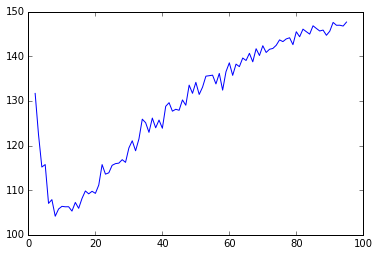

In [24]:
plt.plot(bases,fopxg_ci)

In [25]:
#Factorize
cnmf_kg_ci = CNMF(KgX_ci, num_bases=8)
cnmf_kg_ci.factorize(niter=10)
np.linalg.norm(KgX_ci - np.dot(cnmf_kg_ci.W,cnmf_kg_ci.H))

108.87913282335631

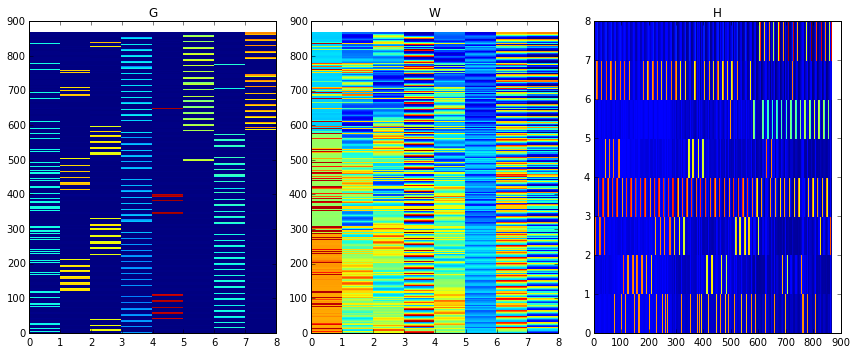

In [26]:
f, axarr = plt.subplots(1, 3)
axarr[0].pcolor(cnmf_kg_ci.G)
axarr[0].set_title('G')
axarr[1].pcolor(cnmf_kg_ci.W)
axarr[1].set_title('W')
axarr[2].pcolor(cnmf_kg_ci.H)
axarr[2].set_title('H')
f.set_size_inches(12,5)
f.tight_layout()

In [27]:
#Pre-image reconstruction
num_atts = sphere_ci.shape[1]
num_bases = 8
preimxkg_ci = np.copy(sphere_ci)
for j in idx_inc:
    # \phi(x_i) to linear projection
    xs = sphere_ci[max(j-num_bases,0):max(j+num_bases,0)]
    xs = np.resize(xs,(num_bases,num_atts))    
    alpha = cnmf_kg_ci.H[:,j] #np.mean(cnmf_kg.H,0)
    preimxkg_ci[j], trainErrorskg = kernel.preimage_isot(xs, alpha, 'rbf', gamma=(2*sigma)**-2)

In [28]:
print "Error_ori: ",np.linalg.norm(sphere - preimxkg_ci)
print "Error_ci: ",np.linalg.norm(sphere_ci - preimxkg_ci)

Error_ori:  12.4342528144
Error_ci:  10.5738369529


<function matplotlib.pyplot.show>

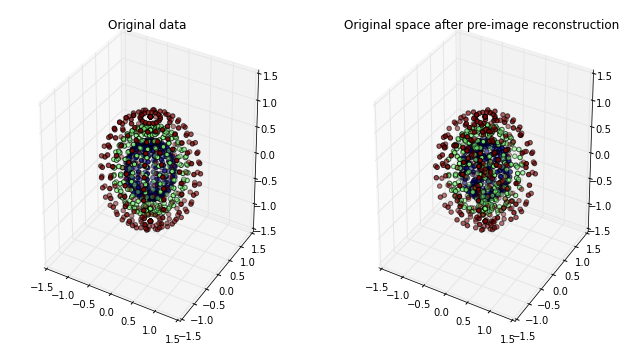

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title("Original data")
sc = ax.scatter(
           sphere[:,0], sphere[:,1], sphere[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title("Original space after pre-image reconstruction")
sc = ax.scatter(
           preimxkg_ci[:,0], preimxkg_ci[:,1], preimxkg_ci[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )
plt.show

Exploring parameters for Convex-NMF with Linear x Gaussian kernel

In [30]:
sigma = 0.5
KlxgX_ci = kernel._get_kernel(sphere_ci, sphere_ci,'linxrbf', gamma=(2*sigma)**-2)

In [31]:
bases = np.arange(2,KlxgX_ci.shape[1]/9)
fopxlxg_ci = np.ones(len(bases))
for idx,item in enumerate(bases):        
    cnmf_klxg_ci = CNMF(KlxgX_ci, item)
    cnmf_klxg_ci.factorize(niter=10)
    fopxlxg_ci[idx] = np.linalg.norm(KlxgX_ci - np.dot(cnmf_klxg_ci.W,cnmf_klxg_ci.H))

In [32]:
print "min base ", bases[np.argmin(fopxlxg_ci)]

min base  25


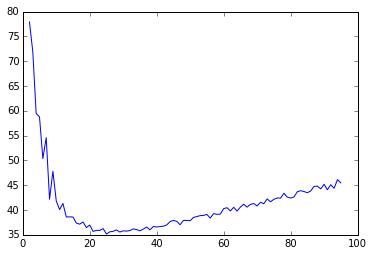

In [33]:
plt.plot(bases,fopxlxg_ci)

In [34]:
#Factorize
cnmf_klxg_ci = CNMF(KlxgX_ci, num_bases=20)
cnmf_klxg_ci.factorize(niter=10)
np.linalg.norm(KlxgX_ci - np.dot(cnmf_klxg_ci.W,cnmf_klxg_ci.H))

37.005189957923321

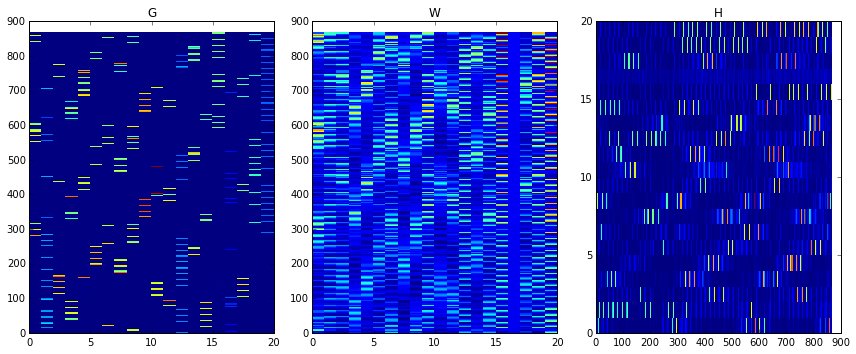

In [35]:
f, axarr = plt.subplots(1, 3)
axarr[0].pcolor(cnmf_klxg_ci.G)
axarr[0].set_title('G')
axarr[1].pcolor(cnmf_klxg_ci.W)
axarr[1].set_title('W')
axarr[2].pcolor(cnmf_klxg_ci.H)
axarr[2].set_title('H')
f.set_size_inches(12,5)
f.tight_layout()

In [71]:
#Pre-image reconstruction
num_atts = sphere_ci.shape[1]
num_bases = 20
#preimxklxg_ci = np.copy(sphere_ci)
for j in idx_inc:
    # \phi(x_i) to linear projection
    xs = sphere_ci[max(j-num_bases,0):max(j+num_bases,0)]
    xs = np.resize(xs,(num_bases,num_atts))    
    alpha = cnmf_klxg_ci.H[:,j] #np.mean(cnmf_kg.H,0)
    print j, xs.shape, alpha.shape
    preimxklxg_ci[i], trainErrorskg = kernel.preimage(xs, alpha, 'linxrbf', gamma=(2*sigma)**-2)

4 (20, 3) (20,)
5 (20, 3) (20,)
7 (20, 3) (20,)
9 (20, 3) (20,)
10 (20, 3) (20,)
13 (20, 3) (20,)
24 (20, 3) (20,)
25 (20, 3) (20,)
26 (20, 3) (20,)
28 (20, 3) (20,)
32 (20, 3) (20,)
33 (20, 3) (20,)
40 (20, 3) (20,)
41 (20, 3) (20,)
46 (20, 3) (20,)
47 (20, 3) (20,)
48 (20, 3) (20,)
50 (20, 3) (20,)
53 (20, 3) (20,)
57 (20, 3) (20,)
58 (20, 3) (20,)
69 (20, 3) (20,)
71 (20, 3) (20,)
77 (20, 3) (20,)
83 (20, 3) (20,)
84 (20, 3) (20,)
85 (20, 3) (20,)
86 (20, 3) (20,)
87 (20, 3) (20,)
89 (20, 3) (20,)
91 (20, 3) (20,)
92 (20, 3) (20,)
93 (20, 3) (20,)
97 (20, 3) (20,)
99 (20, 3) (20,)
103 (20, 3) (20,)
110 (20, 3) (20,)
111 (20, 3) (20,)
114 (20, 3) (20,)
116 (20, 3) (20,)
117 (20, 3) (20,)
120 (20, 3) (20,)
124 (20, 3) (20,)
130 (20, 3) (20,)
133 (20, 3) (20,)
146 (20, 3) (20,)
147 (20, 3) (20,)
150 (20, 3) (20,)
151 (20, 3) (20,)
155 (20, 3) (20,)
162 (20, 3) (20,)
165 (20, 3) (20,)
168 (20, 3) (20,)
169 (20, 3) (20,)
173 (20, 3) (20,)
175 (20, 3) (20,)
177 (20, 3) (20,)
184 (20, 3) (

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 3 while Y.shape[1] == 1

In [72]:
print alpha

[ 0.00334723  0.00849725  0.00283358  0.31205132  0.00694863  0.00087682
  0.00414544  0.00126658  0.00746079  0.02286444  0.05901424  0.20896779
  0.00266586  0.00067936  0.0594082   0.0007583   0.16161306  0.01627169
  0.00120973  0.00150625]


In [73]:
print "Error_ori: ",np.linalg.norm(sphere - preimxklxg_ci)
print "Error_ci: ",np.linalg.norm(sphere_ci - preimxklxg_ci)

Error_ori:  10.0465773626
Error_ci:  0.578469807929


<function matplotlib.pyplot.show>

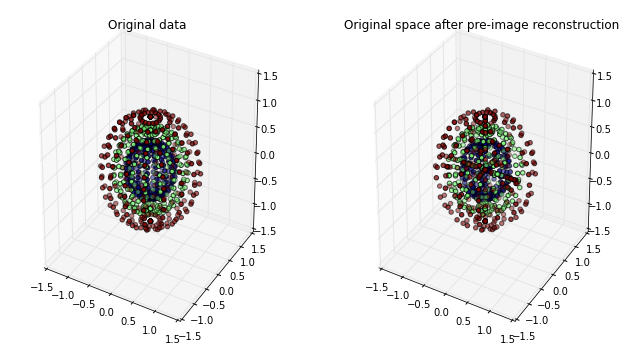

In [74]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title("Original data")
sc = ax.scatter(
           sphere[:,0], sphere[:,1], sphere[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title("Original space after pre-image reconstruction")
sc = ax.scatter(
           preimxklxg_ci[:,0], preimxklxg_ci[:,1], preimxklxg_ci[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )
plt.show

Exploring parameters for Convex-NMF with Polynomial x Gaussian kernel

In [75]:
sigma = 0.5
KpxgX_ci = kernel._get_kernel(sphere_ci,sphere_ci,'polyxrbf', gamma=(2*sigma)**-2, degree=2,coef0=1)

In [76]:
bases = np.arange(2,KpxgX_ci.shape[1]/9)
fopxpxg_ci = np.ones(len(bases))
for idx,item in enumerate(bases):        
    cnmf_kpxg_ci = CNMF(KpxgX_ci, item)
    cnmf_kpxg_ci.factorize(niter=10)
    fopxpxg_ci[idx] = np.linalg.norm(KpxgX_ci - np.dot(cnmf_kpxg_ci.W,cnmf_kpxg_ci.H))

In [77]:
print "min base ", bases[np.argmin(fopxpxg_ci)]

min base  11


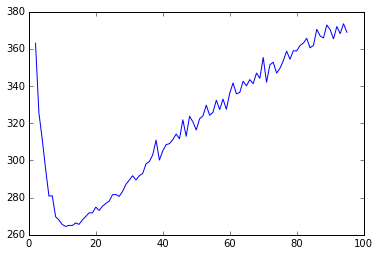

In [78]:
plt.plot(bases,fopxpxg_ci)

In [79]:
#Factorize
cnmf_kpxg_ci = CNMF(KpxgX_ci, num_bases=11)
cnmf_kpxg_ci.factorize(niter=10)
np.linalg.norm(KpxgX_ci - np.dot(cnmf_kpxg_ci.W,cnmf_kpxg_ci.H))

264.19249607712715

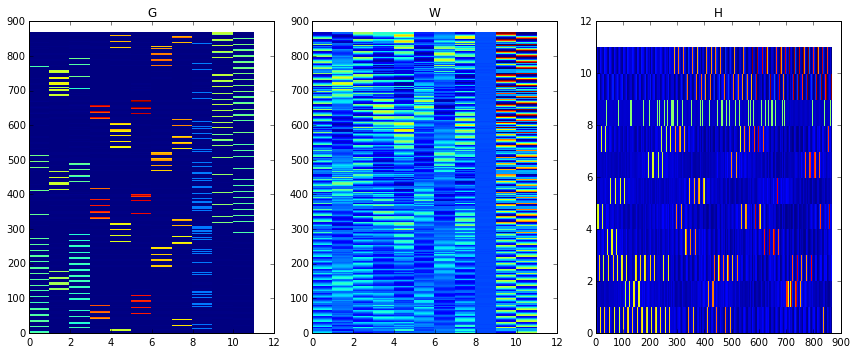

In [80]:
f, axarr = plt.subplots(1, 3)
axarr[0].pcolor(cnmf_kpxg_ci.G)
axarr[0].set_title('G')
axarr[1].pcolor(cnmf_kpxg_ci.W)
axarr[1].set_title('W')
axarr[2].pcolor(cnmf_kpxg_ci.H)
axarr[2].set_title('H')
f.set_size_inches(12,5)
f.tight_layout()

In [87]:
#Pre-image reconstruction
num_atts = sphere_ci.shape[1]
num_bases = 11
preimxkpxg_ci = np.copy(sphere_ci)
for j in idx_inc:
    # \phi(x_i) to linear projection
    xs = sphere_ci[max(j-num_bases,0):max(j+num_bases,0)]
    xs = np.resize(xs,(num_bases,num_atts))    
    alpha = cnmf_kpxg_ci.H[:,j] #np.mean(cnmf_kg.H,0)
    print j, xs.shape, alpha.shape
    preimxkpxg_ci[j], trainErrorskpxg = kernel.preimage_isot(xs, alpha, 'polyxrbf', gamma=(2*sigma)**-2, degree=2,coef0=1)

4 (11, 3) (11,)
5 (11, 3) (11,)
7 (11, 3) (11,)
9 (11, 3) (11,)
10 (11, 3) (11,)
13 (11, 3) (11,)
24 (11, 3) (11,)
25 (11, 3) (11,)
26 (11, 3) (11,)
28 (11, 3) (11,)
32 (11, 3) (11,)
33 (11, 3) (11,)
40 (11, 3) (11,)
41 (11, 3) (11,)
46 (11, 3) (11,)
47 (11, 3) (11,)
48 (11, 3) (11,)
50 (11, 3) (11,)
53 (11, 3) (11,)
57 (11, 3) (11,)
58 (11, 3) (11,)
69 (11, 3) (11,)
71 (11, 3) (11,)
77 (11, 3) (11,)
83 (11, 3) (11,)
84 (11, 3) (11,)
85 (11, 3) (11,)
86 (11, 3) (11,)
87 (11, 3) (11,)
89 (11, 3) (11,)
91 (11, 3) (11,)
92 (11, 3) (11,)
93 (11, 3) (11,)
97 (11, 3) (11,)
99 (11, 3) (11,)
103 (11, 3) (11,)
110 (11, 3) (11,)
111 (11, 3) (11,)
114 (11, 3) (11,)
116 (11, 3) (11,)
117 (11, 3) (11,)
120 (11, 3) (11,)
124 (11, 3) (11,)
130 (11, 3) (11,)
133 (11, 3) (11,)
146 (11, 3) (11,)
147 (11, 3) (11,)
150 (11, 3) (11,)
151 (11, 3) (11,)
155 (11, 3) (11,)
162 (11, 3) (11,)
165 (11, 3) (11,)
168 (11, 3) (11,)
169 (11, 3) (11,)
173 (11, 3) (11,)
175 (11, 3) (11,)
177 (11, 3) (11,)
184 (11, 3) (

In [88]:
print "Error_ori: ",np.linalg.norm(sphere - preimxkpxg_ci)
print "Error_ci: ",np.linalg.norm(sphere_ci - preimxkpxg_ci)

Error_ori:  23.7425319043
Error_ci:  22.3587504882


<function matplotlib.pyplot.show>

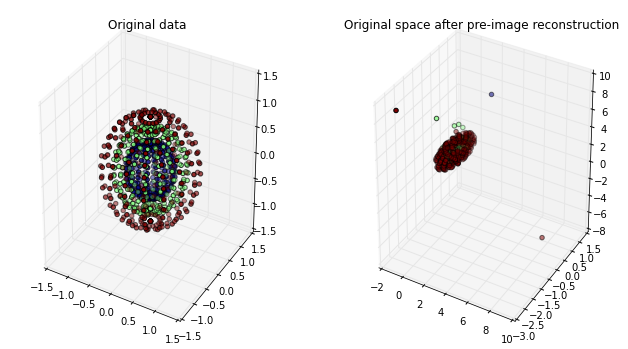

In [89]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(11,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title("Original data")
sc = ax.scatter(
           sphere[:,0], sphere[:,1], sphere[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title("Original space after pre-image reconstruction")
sc = ax.scatter(
           preimxkpxg_ci[:,0], preimxkpxg_ci[:,1], preimxkpxg_ci[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )
plt.show

<function matplotlib.pyplot.show>

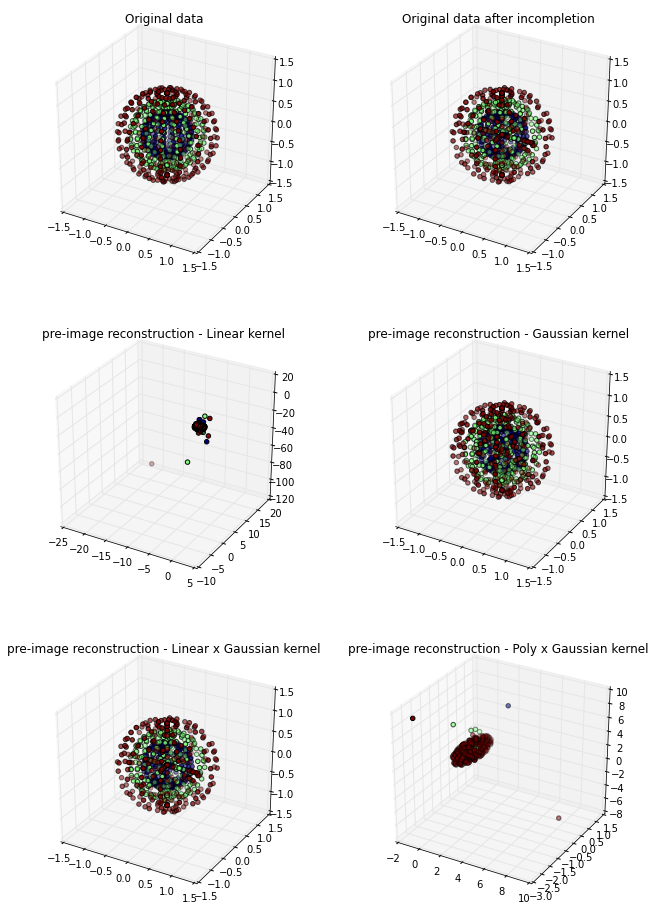

In [93]:
fig = plt.figure(figsize=(11,16))

ax = fig.add_subplot(3, 2, 1, projection='3d')
ax.set_title("Original data")
sc = ax.scatter(
           sphere[:,0], sphere[:,1], sphere[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(3, 2, 2, projection='3d')
ax.set_title("Original data after incompletion")
sc = ax.scatter(
           sphere_ci[:,0], sphere_ci[:,1], sphere_ci[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(3, 2, 3, projection='3d')
ax.set_title("pre-image reconstruction - Linear kernel")
sc = ax.scatter(
           preimxkl_ci[:,0], preimxkl_ci[:,1], preimxkl_ci[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(3, 2, 4, projection='3d')
ax.set_title("pre-image reconstruction - Gaussian kernel")
sc = ax.scatter(
           preimxkg_ci[:,0], preimxkg_ci[:,1], preimxkg_ci[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(3, 2, 5, projection='3d')
ax.set_title("pre-image reconstruction - Linear x Gaussian kernel")
sc = ax.scatter(
           preimxklxg_ci[:,0], preimxklxg_ci[:,1], preimxklxg_ci[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(3, 2, 6, projection='3d')
ax.set_title("pre-image reconstruction - Poly x Gaussian kernel")
sc = ax.scatter(
           preimxkpxg_ci[:,0], preimxkpxg_ci[:,1], preimxkpxg_ci[:,2],  # data
           c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

plt.show

$\textbf{Computing completion error}$

In [99]:
print 'Ori vs. Incomplete', np.linalg.norm(sphere[idx_inc] - sphere_ci[idx_inc])
print 'Lineal', np.linalg.norm(sphere[idx_inc] - preimxkl_ci[idx_inc])
print 'Gaussian', np.linalg.norm(sphere[idx_inc] - preimxkg_ci[idx_inc])
print 'Lineal x Gaussian', np.linalg.norm(sphere[idx_inc] - preimxklxg_ci[idx_inc])
print 'Poly x Gaussian', np.linalg.norm(sphere[idx_inc] - preimxkpxg_ci[idx_inc])


Ori vs. Incomplete 10.0299097396
Lineal 119.616198669
Gaussian 12.4342528144
Lineal x Gaussian 10.0465773626
Poly x Gaussian 23.7425319043


<function matplotlib.pyplot.show>

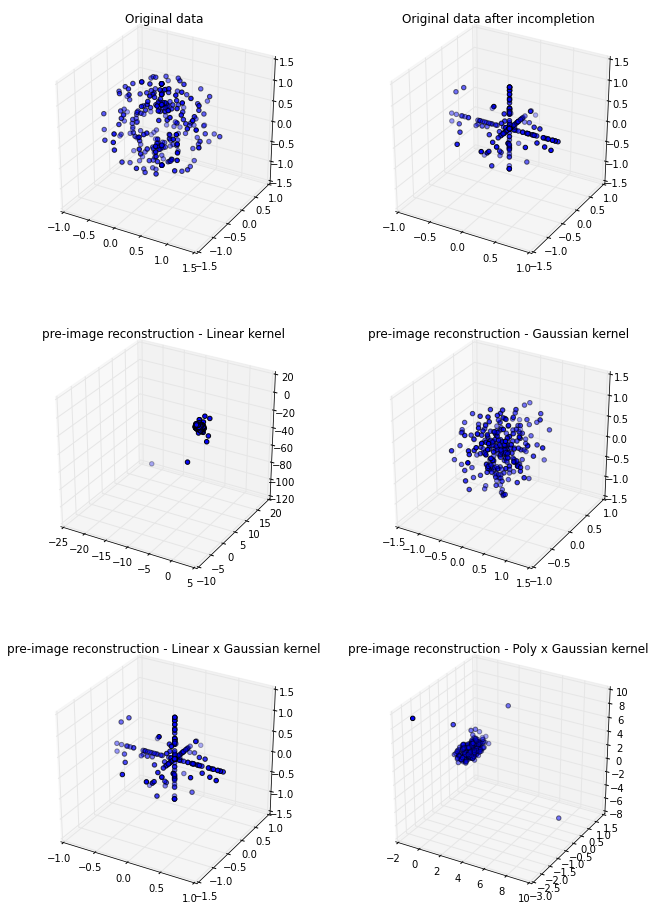

In [115]:
fig = plt.figure(figsize=(11,16))

ax = fig.add_subplot(3, 2, 1, projection='3d')
ax.set_title("Original data")
sc = ax.scatter(
           sphere[idx_inc,0], sphere[idx_inc,1], sphere[idx_inc,2],  # data
           #c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(3, 2, 2, projection='3d')
ax.set_title("Original data after incompletion")
sc = ax.scatter(
           sphere_ci[idx_inc,0], sphere_ci[idx_inc,1], sphere_ci[idx_inc,2],  # data
           #c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(3, 2, 3, projection='3d')
ax.set_title("pre-image reconstruction - Linear kernel")
sc = ax.scatter(
           preimxkl_ci[idx_inc,0], preimxkl_ci[idx_inc,1], preimxkl_ci[idx_inc,2],  # data
           #c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(3, 2, 4, projection='3d')
ax.set_title("pre-image reconstruction - Gaussian kernel")
sc = ax.scatter(
           preimxkg_ci[idx_inc,0], preimxkg_ci[idx_inc,1], preimxkg_ci[idx_inc,2],  # data
           #c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(3, 2, 5, projection='3d')
ax.set_title("pre-image reconstruction - Linear x Gaussian kernel")
sc = ax.scatter(
           preimxklxg_ci[idx_inc,0], preimxklxg_ci[idx_inc,1], preimxklxg_ci[idx_inc,2],  # data
           #c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

ax = fig.add_subplot(3, 2, 6, projection='3d')
ax.set_title("pre-image reconstruction - Poly x Gaussian kernel")
sc = ax.scatter(
           preimxkpxg_ci[idx_inc,0], preimxkpxg_ci[idx_inc,1], preimxkpxg_ci[idx_inc,2],  # data
           #c=sphere_label,                            # marker colour
           #marker='o',                                # marker shape
           #s=(param_values[:,2]*100)                                 # marker size
           )

plt.show

## Test Completion Method (Second approach)

Train CKMF over complete data and generalize for complation.

$\textbf{References}$

Honeine and Richard, Preimage Problem in Kernel-Based Machine Learning,  An intimate connection with the dimensionality-reduction problem, 2011

Tin-Yau and Wai-Hung, The Pre-Image Problem in Kernel Methods, 2004

In [78]:
x = np.array([[1,2]])
np.dot(x.T,x)

array([[1, 2],
       [2, 4]])

In [79]:
a = np.array([[1, 2], [3,4]])
np.linalg.eig(a)

(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))